# Introduction

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face.

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

At this time, there are no specific vaccines or treatments for COVID-19. However, there are many ongoing clinical trials evaluating potential treatments. WHO will continue to provide updated information as soon as clinical findings become available.

Stay informed:

Protect yourself: advice for the public Myth busters Questions and answers Situation reports All information on the COVID-19 outbreak

# Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv(r"us-counties.csv")

In [3]:
df.head(30)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


In [4]:
# dropping ALL duplicte values 
df.drop_duplicates(subset ="date", inplace = True) 

In [5]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0


In [6]:
df.shape

(145, 6)

In [7]:
df = df.drop(['county', 'state', 'fips', 'deaths'], axis = 1)

In [8]:
df.describe() #Checking datasets statistics

,cases
count,145.000000
mean,55.675862
std,87.023774
min,1.000000
25%,1.000000
50%,10.000000
75%,67.000000
max,335.000000


In [9]:
#Checking top 10 Values, Which will give me idea if there is any Outlier present in the dataset or any large value present in the dataset
df.nlargest(10, ['cases'])

,date,cases
230714,2020-06-13,335
227689,2020-06-12,327
224666,2020-06-11,316
221644,2020-06-10,296
218628,2020-06-09,283
215616,2020-06-08,273
212606,2020-06-07,266
209599,2020-06-06,260
206593,2020-06-05,249
203591,2020-06-04,242


In [10]:
df=df.set_index('date')

In [11]:
df.head()

,cases
date,
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,1
2020-01-25,1


# EDA

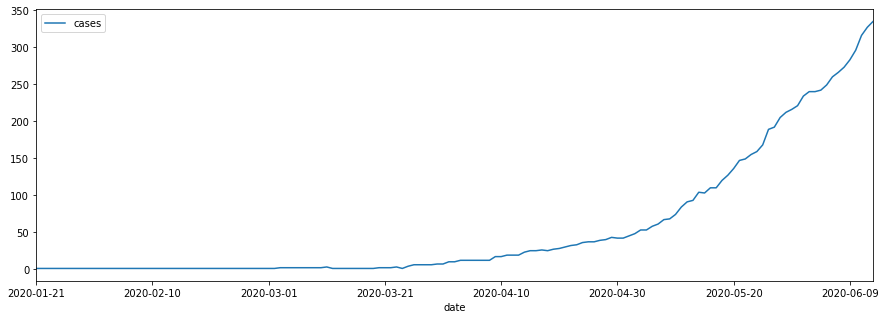

In [12]:
df.plot(kind="line",figsize=(15,5))
plt.show()

# Checking for Stationarity 

# using Ad fuller test


In [13]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['cases'])

In [14]:
# Here I am considering H0 as Non stationary, and H1 as stationary
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(cases):
    result=adfuller(cases)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [15]:
adfuller_test(df['cases'])

ADF Test Statistic : 13.58218760045432
p-value : 1.0
#Lags Used : 0
Number of Observations Used : 144
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Checking which components are present- using decomposition method

###  Decomposition Methods
•Decomposition methods are based on an analysis of the
individual components of a time series. The strength of
each component is estimated separately and then
substituted into a model that explains the behavior of the
time series.

We have two types of Decomposition methods-

1. Additive: xt = Trend + Seasonal +Cyclic+ Random,
The multiplicative decomposition model is expressed as the product of the four components of a time series: Yt = TRt × St × Ct × It and Is useful when seasonal variation is increasing overtime
2. Multiplicative: xt = Trend * Seasonal* Cyclic * Random 
Another approach is to treat each observation of a time series as the sum of these four components. Yt = TRt + St + Ct + It and Is useful when season variation is relatively constant over time

Here I will try both the models and see the differences

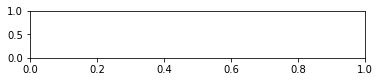

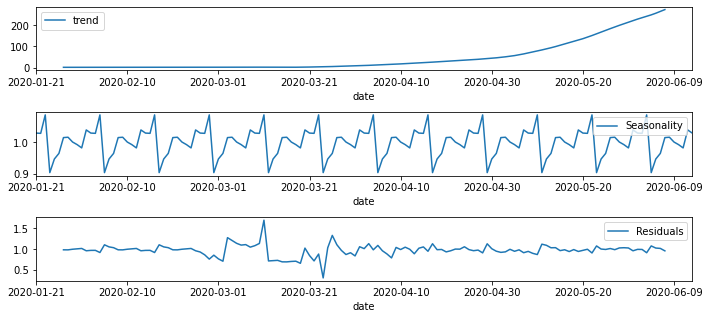

In [16]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

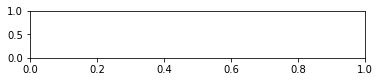

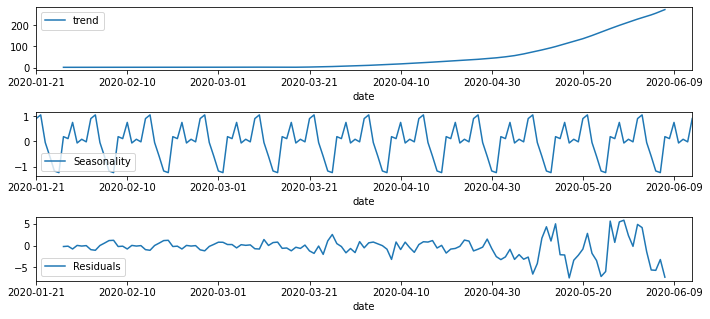

In [17]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Smoothing technique - 

In [18]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [19]:
train=df[0:100]  #Spliting into train and test
test=df[100:]

In [20]:
train.shape

(100, 1)

In [21]:
test.shape

(45, 1)

In [22]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['cases'])).fit(smoothing_level = 0.5)
fit1.summary()

Dep. Variable:,endog,No. Observations:,100
Model:,Holt,SSE,88.084
Optimized:,True,AIC,-4.688
Trend:,Additive,BIC,5.733
Seasonal:,None,AICC,-3.785
Seasonal Periods:,None,Date:,"Wed, 17 Jun 2020"
Box-Cox:,False,Time:,02:10:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
smoothing_slope,0.1797537,beta,True


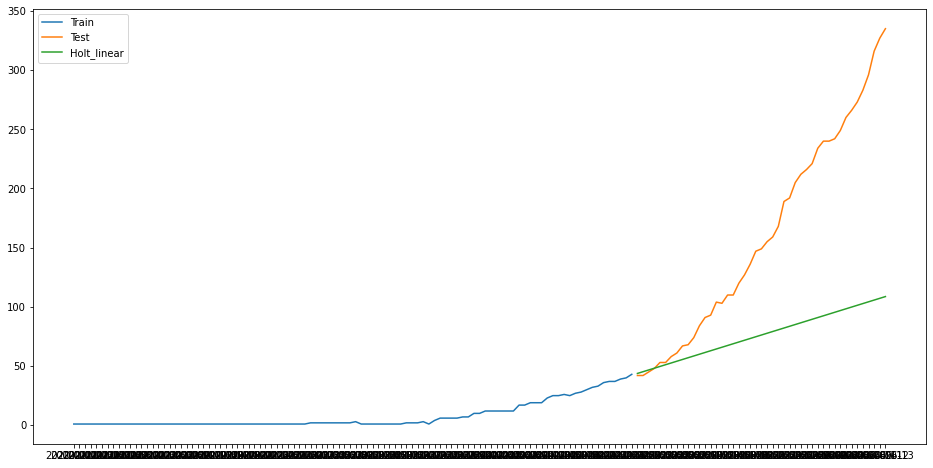

In [23]:

y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['cases'], label='Train')
plt.plot(test['cases'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
rmse_trend_smoothing = sqrt(mean_squared_error(test.cases, y_hat_avg.Holt_linear))
print(rmse_trend_smoothing)

109.62241907072666


#### Holt's winter smoothing technique for seasonality and trend

In [26]:
y_hat_avg2 = test.copy()
fit2 = ExponentialSmoothing(np.asarray(train['cases']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
fit2.summary()

Dep. Variable:,endog,No. Observations:,100
Model:,ExponentialSmoothing,SSE,77.525
Optimized:,True,AIC,-3.457
Trend:,Additive,BIC,25.200
Seasonal:,Additive,AICC,0.776
Seasonal Periods:,7,Date:,"Wed, 17 Jun 2020"
Box-Cox:,False,Time:,02:10:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6438996,alpha,True
smoothing_slope,0.1562623,beta,True


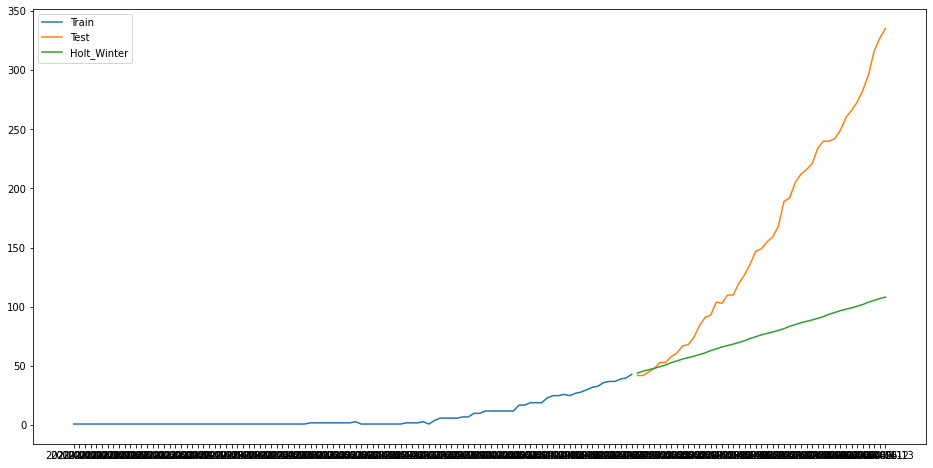

In [27]:

y_hat_avg2['Holt_Winter'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['cases'], label='Train')
plt.plot(test['cases'], label='Test')
plt.plot(y_hat_avg2['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [28]:
rmse_trend_Seasonality_smoothing = sqrt(mean_squared_error(test.cases, y_hat_avg2.Holt_Winter))
print(rmse_trend_Seasonality_smoothing)

109.88472929966045


# ARIMA Modeling




In [29]:
df['cases'] = df['cases'] - df['cases'].shift(1)


In [30]:
df.head()

,cases
date,
2020-01-21,NaN
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0


### Applying Dickey Fuller test again

In [31]:

## Again test dickey fuller test
adfuller_test(df['cases'].dropna())

ADF Test Statistic : 1.625788391380594
p-value : 0.9979329176472894
#Lags Used : 14
Number of Observations Used : 129
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [37]:
df['cases'] = df['cases'] - df['cases'].shift(31)


### Applying Dickey Fuller test again

In [39]:

## Again test dickey fuller test
adfuller_test(df['cases'].dropna())

ADF Test Statistic : -8.250637416408178
p-value : 5.40292192310681e-13
#Lags Used : 0
Number of Observations Used : 82
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# ACF and PACF

ARIMA Model has three parameters p, d, q  where p represent AR, d represents defferencing and q represents Moving average

And Indentification of AR model is done with PACF , Indentification of MA model is done with ACF

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

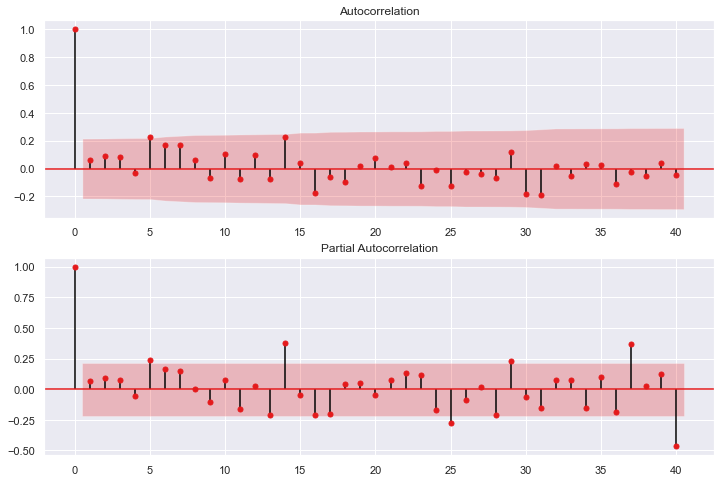

In [42]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['cases'].dropna(),lags=40,ax=ax1) #Using 13 because first 12 values are NA values
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['cases'].dropna(),lags=40,ax=ax2)

In [43]:
New_Time=train.dropna()

In [44]:
New_Time.head()

,cases
date,
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,1
2020-01-25,1


In [45]:
New_Time.shape

(100, 1)

In [46]:
test.shape

(45, 1)

In [47]:
new_Time_Test = test.dropna()

In [48]:
new_Time_Test.shape

(45, 1)

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [69]:
ARIMA_MODEL = ARIMA(New_Time, order = (2,2,2))

In [70]:
ARIMA_MODEL_Fit = ARIMA_MODEL.fit()

In [71]:
ARIMA_MODEL_Fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.cases   No. Observations:                   98
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -132.042
Method:                       css-mle   S.D. of innovations              0.920
Date:                Wed, 17 Jun 2020   AIC                            276.085
Time:                        03:33:13   BIC                            291.595
Sample:                    01-23-2020   HQIC                           282.358
                         - 04-29-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0171      0.007      2.489      0.013       0.004       0.030
ar.L1.D2.cases    -0.8750      0.406     -2.153      0.031      -1.672      -0.078
ar.L2.D2.cases    -0.1965      0.132     -1.492      0.136      -0.455       0.062
ma.L1.D2.cases    -0.3012      0.400     -0.753      0.451      -1.085       0.483
ma.L2.D2.cases    -0.5648      0.369     -1.529      0.126      -1.289       0.159
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.2267           -0.3623j            2.2560           -0.4743
AR.2           -2.2267           +0.3623j            2.2560            0.4743
MA.1            1.0904           +0.0000j            1.0904            0.0000
MA.2           -1.6237           +0.0000j            1.6237            0.5000
-----------------------------------------------------------------------------
"""

In [72]:
Arima_Forecast = ARIMA_MODEL_Fit.forecast(steps = 45)[0]

In [73]:
Arima_Forecast

array([ 44.146993  ,  45.67959665,  47.27419849,  48.77411221,
        50.3800281 ,  51.947123  ,  53.56268858,  55.17879779,
        56.82023661,  58.47473357,  60.14815647,  61.837782  ,
        63.54484018,  65.2687898 ,  67.00986276,  68.76796248,
        70.5431279 ,  72.33534393,  74.14461611,  75.97094257,
        77.81432385,  79.67475985,  81.55225055,  83.44679599,
        85.35839613,  87.287051  ,  89.23276059,  91.1955249 ,
        93.17534393,  95.17221768,  97.18614614,  99.21712933,
       101.26516724, 103.33025986, 105.41240721, 107.51160928,
       109.62786606, 111.76117757, 113.91154379, 116.07896474,
       118.2634404 , 120.46497079, 122.68355589, 124.91919571,
       127.17189026])

In [74]:
np.sqrt(mean_squared_error(new_Time_Test,Arima_Forecast))

100.93484082262259

### SARIMA model

In [77]:
model_S = sm.tsa.SARIMAX(New_Time, order=(2,2,2), seasonal_order=(2,2,2,20))
model_fit=model_S.fit(disp=True)
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              cases   No. Observations:                  100
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 20)   Log Likelihood                -103.128
Date:                            Wed, 17 Jun 2020   AIC                            224.256
Time:                                    03:35:31   BIC                            242.800
Sample:                                01-21-2020   HQIC                           231.479
                                     - 04-29-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2592      3.008     -0.419      0.676      -7.156       4.637
ar.L2         -0.3046      1.182   

In [78]:
forecast = model_fit.forecast(steps=45)
print(forecast)

2020-04-30     44.778318
2020-05-01     46.684517
2020-05-02     49.105312
2020-05-03     48.836035
2020-05-04     54.077361
2020-05-05     57.463835
2020-05-06     58.619518
2020-05-07     60.198846
2020-05-08     60.808279
2020-05-09     63.570375
2020-05-10     65.806850
2020-05-11     68.745420
2020-05-12     70.967374
2020-05-13     73.833730
2020-05-14     76.593323
2020-05-15     78.186706
2020-05-16     79.324526
2020-05-17     81.458182
2020-05-18     83.138847
2020-05-19     89.540816
2020-05-20     91.675383
2020-05-21     94.919734
2020-05-22     98.138565
2020-05-23     98.034386
2020-05-24    105.798000
2020-05-25    111.073552
2020-05-26    113.012429
2020-05-27    115.605342
2020-05-28    116.825190
2020-05-29    121.121187
2020-05-30    124.044062
2020-05-31    129.767895
2020-06-01    133.135260
2020-06-02    137.701054
2020-06-03    141.784675
2020-06-04    144.381628
2020-06-05    146.315528
2020-06-06    149.627813
2020-06-07    152.282264
2020-06-08    161.493927


In [80]:
SARIMA_RMSE = np.sqrt(mean_squared_error(new_Time_Test,forecast))

In [81]:
print(SARIMA_RMSE)

74.78666402733856


## Models Result as per their RMSE scores